In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_blobs

In [2]:
X, y = make_regression(n_samples=20, n_features=1, random_state=42, noise=15)

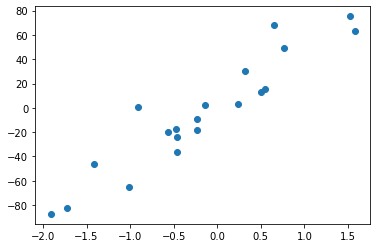

In [3]:
plt.scatter(X, y)

In [ ]:
from sklearn.kernel_approximation.pairwise_kernels import 

In [4]:
from sklearn.svm import SVR, SVC

In [5]:
from sklearn.gaussian_process.kernels \
    import (RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct,
            ConstantKernel, WhiteKernel, PairwiseKernel, KernelOperator,
            Exponentiation, Kernel, CompoundKernel)

In [6]:
from ipywidgets import interact

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
@interact
def svm(C=(0.01, 15, 0.1), epsilon=(0.05, 0.15, 0.05),
        kernel=['rbf', 'poly', 'linear', 'sigmoid'], coef0=(0.,2.,0.1), 
        gamma=(0.1, 3., 0.1)):
    model = SVR(C=C, epsilon=epsilon, gamma=gamma, kernel=kernel, coef0=coef0)
    ys = StandardScaler().fit_transform(y.reshape(-1, 1))
    model.fit(X, ys.ravel())
    xrange = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    plt.plot(xrange.ravel(), model.predict(xrange), color='red', label='fitted')
    plt.scatter(X, ys.ravel(), color='blue', label='actual')
    plt.legend()

interactive(children=(FloatSlider(value=7.41, description='C', max=15.0, min=0.01), FloatSlider(value=0.1, des…

In [9]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVR(),
                    param_grid={'C':[0.1, 0.7, 1, 3, 5],
                                'gamma':['auto', 'scale', 0.1, 1, 5],
#                                 'epsilon':[0.1, 1, 10],
                                'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
                                'coef0': [0., 0.5, 0.8]},
                   cv=10)
scaler = StandardScaler()
grid.fit(X, scaler.fit_transform(y.reshape(-1, 1)).ravel())

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.7, 1, 3, 5], 'coef0': [0.0, 0.5, 0.8],
                         'gamma': ['auto', 'scale', 0.1, 1, 5],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
grid.best_params_

{'C': 5, 'coef0': 0.8, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [10]:
grid.best_score_

0.2569361958383105

In [11]:
z = X**2

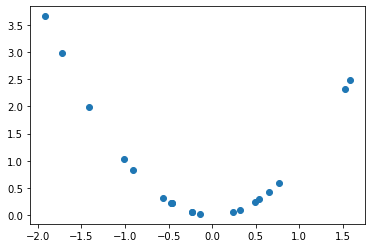

In [12]:
plt.scatter(X, z)

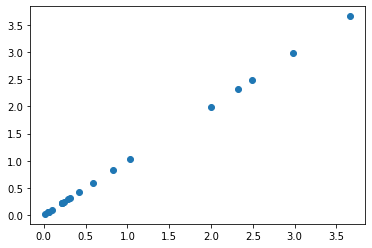

In [13]:
plt.scatter(X**2, z)

In [14]:
x = np.random.randn(90,2)

In [15]:
import seaborn as sns

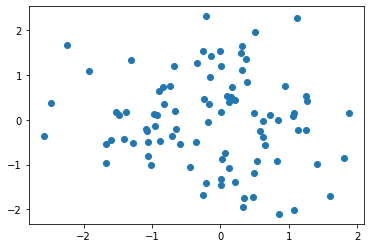

In [16]:
plt.scatter(*x.T)

In [17]:
@interact
def rbf(gamma=(0.1,5,0.1)):
    print('Effect of gamma on radial basis function kernel:')
    print('Red and blue indicate high and low similarity, respectively.')
    sns.heatmap(RBF(length_scale=gamma)(x), vmin=0, vmax=1, cmap='jet')

interactive(children=(FloatSlider(value=2.5000000000000004, description='gamma', max=5.0, min=0.1), Output()),…

Actual points on a scatter plot.
Note that distant points 24, 40 and 54 are always marked in colder colors in heatmap above.


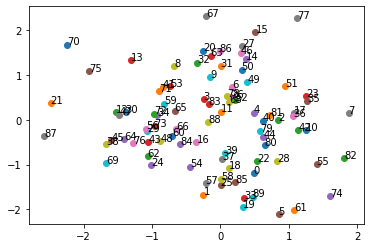

In [18]:
for i in range(x.shape[0]):
    plt.scatter(x.T[0][i], x.T[1][i])
    plt.text(*x[i], i)
print('Actual points on a scatter plot.')
print('Note that distant points 24, 40 and 54 are always marked in colder colors in heatmap above.')

In [19]:
clx, cly = make_blobs(n_samples=90, centers=2, n_features=2, random_state=42)

In [20]:
@interact
def rbf(gamma=(0.1,5,0.1)):
    sns.heatmap(pd.DataFrame(RBF(length_scale=gamma)(clx)).sort_values(0), vmin=0, vmax=1, cmap='jet')
    print('Exploring similarities for a 2-cluster dataset:')
    print('For any Gamma > 0, points of opposite clusters can instantly be identified from significantly small similarities.')
    print('This advantage is lost for Gamma < 1.0')


interactive(children=(FloatSlider(value=2.5000000000000004, description='gamma', max=5.0, min=0.1), Output()),…

Linear kernel for the same 2-cluster dataset.


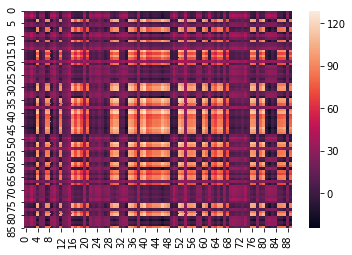

In [166]:
sns.heatmap(DotProduct()(clx))
print('Linear kernel for the same 2-cluster dataset.')

In [10]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=6, random_state=42)

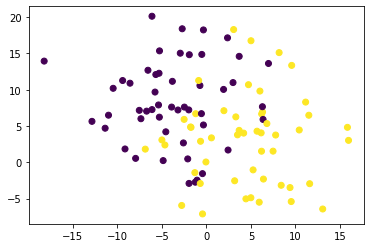

In [11]:
plt.scatter(*X.T, c=y)

In [12]:
xx, yy = np.meshgrid(*[np.linspace(X.T[i].min(), X.T[i].max(), 300) for i in range(2)])
xrange = np.array([xx.ravel(), yy.ravel()]).T

In [13]:
print('High std clusters example.')
@interact
def svm(C=(0.01, 15, 0.1),
        kernel=['rbf', 'poly', 'linear', 'sigmoid'], coef0=(0.,2.,0.1), 
        gamma=(0.1, 3., 0.1)):
    global model
    model = SVC(C=C, gamma=gamma, kernel=kernel, coef0=coef0)
    model.fit(X, y)
    plt.contourf(xx, yy, model.predict(xrange).reshape(xx.shape), alpha=0.5)
    plt.scatter(*X.T, c=y, edgecolors='black')
#     plt.legend()

High std clusters example.


interactive(children=(FloatSlider(value=7.41, description='C', max=15.0, min=0.01), Dropdown(description='kern…

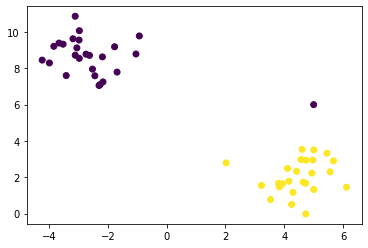

In [25]:
A, b = make_blobs(n_samples=50, n_features=2, centers=2, random_state=42)
A = np.vstack([A, [[5, 6]]])
b = np.hstack([b, 0])
plt.scatter(*A.T, c=b)
aa, bb = np.meshgrid(*[np.linspace(A.T[i].min(), A.T[i].max(), 300) for i in range(2)])
arange = np.array([aa.ravel(), bb.ravel()]).T

In [26]:
print('Large margin clusters with outlier example.')
print('Try using linear kernel with small C values to see SVM\'s robustness to outliers.')
@interact
def svm(C=(0.01, 15, 0.1),
        kernel=['rbf', 'poly', 'linear', 'sigmoid'], coef0=(0.,2.,0.1), 
        gamma=(0.1, 3., 0.1)):
    global model
    model = SVC(C=C, gamma=gamma, kernel=kernel, coef0=coef0)
    model.fit(A, b)
    plt.contourf(aa, bb, model.predict(arange).reshape(aa.shape), alpha=0.5)
    plt.scatter(*A.T, c=b, edgecolors='black')
#     plt.legend()

Large margin clusters with outlier example.
Try using linear kernel with small C values to see SVM's robustness to outliers.


interactive(children=(FloatSlider(value=7.41, description='C', max=15.0, min=0.01), Dropdown(description='kern…